## Data Exploration to be able to  undertand how to solve the problem

## Importing data

In [1]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
import pickle
DATA_URL ="datasets/"

In [2]:
df = pd.read_csv(DATA_URL + "adult_train.csv")
df.head(100)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


## Data Scaling

In [3]:
df

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df = df[['Age', 'Workclass', 'Education_Num', 'fnlwgt', 'Education', 
    #'Education_Num','Martial_Status', 
    'Occupation', 
    #'Relationship', 'Race', 'Sex','Capital_Gain', 'Capital_Loss', 
    'Hours_per_week', 
    'Country','Target']].copy()


In [6]:
df.describe()

,Age,Education_Num,fnlwgt,Hours_per_week
count,32561.000000,32561.000000,3.256100e+04,32561.000000
mean,38.581647,10.080679,1.897784e+05,40.437456
std,13.640433,2.572720,1.055500e+05,12.347429
min,17.000000,1.000000,1.228500e+04,1.000000
25%,28.000000,9.000000,1.178270e+05,40.000000
50%,37.000000,10.000000,1.783560e+05,40.000000
75%,48.000000,12.000000,2.370510e+05,45.000000
max,90.000000,16.000000,1.484705e+06,99.000000


In [7]:
print(df)

       Age          Workclass  Education_Num  fnlwgt    Education  \
0       39          State-gov             13   77516    Bachelors   
1       50   Self-emp-not-inc             13   83311    Bachelors   
2       38            Private              9  215646      HS-grad   
3       53            Private              7  234721         11th   
4       28            Private             13  338409    Bachelors   
...    ...                ...            ...     ...          ...   
32556   27            Private             12  257302   Assoc-acdm   
32557   40            Private              9  154374      HS-grad   
32558   58            Private              9  151910      HS-grad   
32559   22            Private              9  201490      HS-grad   
32560   52       Self-emp-inc              9  287927      HS-grad   

               Occupation  Hours_per_week         Country  Target  
0            Adm-clerical              40   United-States   <=50K  
1         Exec-managerial          

In [8]:
df = df.rename(columns={'fnlwgt':'Final_Weight'})

In [9]:
#Checking an example duplicate
df.query('Final_Weight == "116632"')

,Age,Workclass,Education_Num,Final_Weight,Education,Occupation,Hours_per_week,Country,Target


In [10]:
df=df.loc[~df.duplicated(subset=['Final_Weight','Workclass','Occupation'])]\
.reset_index(drop=True).copy()

In [11]:
df['Hours_per_week']. value_counts()

40    14449
50     2649
45     1722
60     1410
35     1236
      ...  
94        1
82        1
86        1
92        1
87        1
Name: Hours_per_week, Length: 93, dtype: int64

Text(0, 0.5, 'People amount')

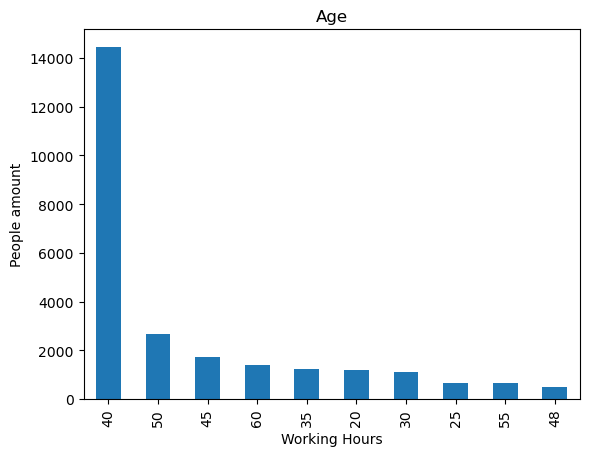

In [12]:
ax=df['Hours_per_week']. value_counts()\
.head(10)\
.plot(kind='bar',title='Age')
ax.set_xlabel('Working Hours')
ax.set_ylabel('People amount')

## Training data

In [13]:
datas = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [14]:
%matplotlib inline

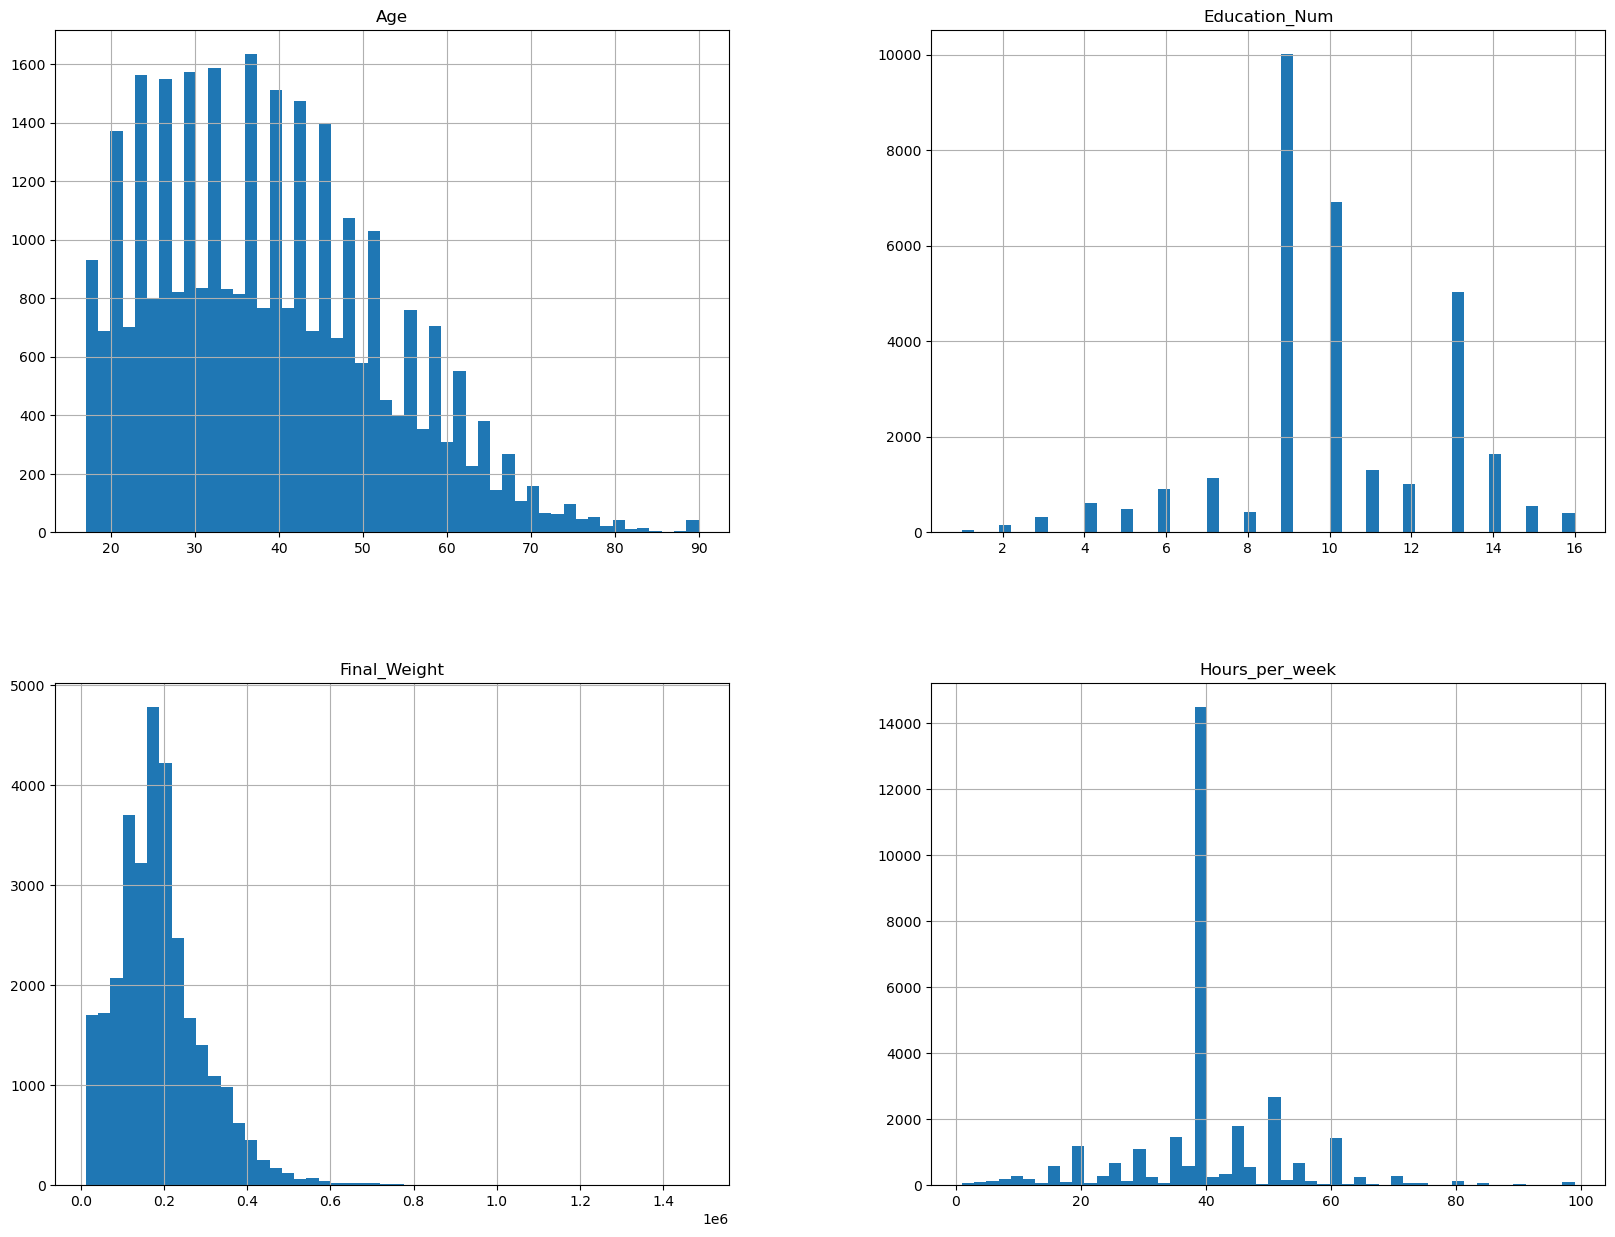

In [15]:
datas.hist(bins=50,figsize=(20,15))
plt.show();

In [16]:
empty_cols = [column for column in datas.columns if column not in ['Age', 'Hours_per_week']]
non_id_cols = [column for column in datas.columns if column != 'Age']

imputer = SimpleImputer(missing_values=0, strategy='median')
empty_transformer = ColumnTransformer(
    [('impute', imputer, empty_cols)],
    remainder='passthrough',    #Did not touch the other columns
    verbose_feature_names_out=False)    #Did not add a prefix to the column names  
empty_transformer.set_output(transform='pandas')  #Output to a table, not an array

scaler = StandardScaler()
scale_transformer = ColumnTransformer(
    [('scale', scaler, non_id_cols)],
    remainder='passthrough',    #Did not touch the other columns
    verbose_feature_names_out=False)    #Did not add a prefix to the column names 
scale_transformer.set_output(transform='pandas')  #Output to a table, not an array

preproc_pipeline = Pipeline([
    ('imputer', empty_transformer),
    ('scaler', scale_transformer)]
)
preproc_pipeline

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(missing_values=0,
                                                                strategy='median'),
                                                  ['Workclass', 'Education_Num',
                                                   'Final_Weight', 'Education',
                                                   'Occupation', 'Country',
                                                   'Target'])],
                                   verbose_feature_names_out=False)),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Workclass', 'Education_Num',
                                                   'Final_Weight', 'Education',
                                                   'Occupation',
                                                   'Hours_per_week', 'Country',
                                                   'Target'])],
                                   verbose_feature_names_out=False))])

## Divide the input data into two samples - training and test: this makes it easy to comprehend how the implication of the results in each group

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

data = datas[non_id_cols]
labels = datas['Education_Num']

shuffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=12345)

for idx_train, idx_test in shuffle.split(data, labels):
    pass

X_test = data.iloc[idx_test]
y_test = labels.iloc[idx_test]

X_train = data.iloc[idx_train]
y_train = labels.iloc[idx_train]

In [18]:
print(X_train)

               Workclass  Education_Num  Final_Weight      Education  \
5812                   0             10        394820   Some-college   
18920          State-gov              9        142022        HS-grad   
14048   Self-emp-not-inc              9        278073        HS-grad   
30485            Private             13         93639      Bachelors   
17576            Private              9        190786        HS-grad   
...                  ...            ...           ...            ...   
19589            Private             10         40767   Some-college   
19259            Private              9        185847        HS-grad   
29188          State-gov             14        176077        Masters   
4998         Federal-gov             10        348491   Some-college   
21669            Private             13        267431      Bachelors   

               Occupation  Hours_per_week         Country  Target  
5812                    0              20   United-States   <=50K  

In [19]:
print(y_train)

5812     10
18920     9
14048     9
30485    13
17576     9
         ..
19589    10
19259     9
29188    14
4998     10
21669    13
Name: Education_Num, Length: 24746, dtype: int64


Step 3: Develop a pipeline for training and cross-validation of the data

In [20]:
df.dtypes

Age                int64
Workclass         object
Education_Num      int64
Final_Weight       int64
Education         object
Occupation        object
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [21]:
classifiers = {
    'logistic_regression': (LogisticRegression(solver='saga', max_iter = 1000, random_state=123),
        {'clf__C': uniform(loc=0.1, scale=10), 'clf__penalty': ['l2', 'l1']}),
    'support_vectors': (SVC(kernel='poly'),
        {'clf__C': uniform(loc=0.1, scale=10), 'clf__degree': randint(2,5), 
        'clf__gamma': uniform(loc = 0, scale = 1), 'clf__coef0': uniform(loc=-1, scale=2)}),
    'knn': (KNeighborsClassifier(),
        {'clf__n_neighbors': randint(2,10), 'clf__p': randint(1,3)}),
    'bayes': (GaussianNB(),
        {'clf__var_smoothing': uniform(loc=1e-10, scale=1)}),
    'random_forest': (RandomForestClassifier(random_state=123),
        {'clf__n_estimators': randint(100,300), 'clf__max_features': ['sqrt', 'log2'], 
        'clf__min_samples_split': randint(2,5)}
    )
}

dataframe = pd.DataFrame(['accuracy', 'recall', 'precision', 'ROC AUC curve'])

for name, values in classifiers.items():
    clf, params = values
    pipeline = Pipeline([
        ("preproc", preproc_pipeline),
        ('clf', clf)]
    )
    model = RandomizedSearchCV(pipeline, params)

    model.fit(X_train, y_train)

    with open(f"saved_models/{name}.pkl", "wb") as file:
        pickle.dump(model, file, protocol=3)
    with open(f"hyperparams/{name}.txt", "w") as file:
        file.write(str(model.best_params_))
    print(name)
    print(model.best_params_, '\n' + '=' * 20)

    y_pred = model.predict(X_test)
    y_true = np.array(y_test)

    dataframe[name] = [accuracy_score(y_true, y_pred), recall_score(y_true, y_pred), 
    precision_score(y_true, y_pred), roc_auc_score(y_true, y_pred)]

    print(  f'Confusion matrix:\n {confusion_matrix(y_true, y_pred)}\n'
    )

dataframe

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 438, in fit_transform
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 726, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 657, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 597, in __init__
    self.results = batch()
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\impute\_base.py", line 389, in fit
    X = self._validate_input(X, in_fit=True)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\impute\_base.py", line 341, in _validate_input
    raise new_ve from None
ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: ' Private'

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 438, in fit_transform
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 726, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 657, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 597, in __init__
    self.results = batch()
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\impute\_base.py", line 389, in fit
    X = self._validate_input(X, in_fit=True)
  File "C:\Users\perge\anaconda3\lib\site-packages\sklearn\impute\_base.py", line 341, in _validate_input
    raise new_ve from None
ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: ' State-gov'
